In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
!pip install wordcloud
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

C:\Users\Vanshika Mishra\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data = pd.read_csv("BBC News.csv")

In [3]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


## Understanding Features and Target Variables


In [4]:
data['Category'].unique() 

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [5]:
data.shape

(1490, 3)

In [6]:
data.dtypes

ArticleId     int64
Text         object
Category     object
dtype: object

## Checking for NULL values

In [7]:
data.isnull().any()

ArticleId    False
Text         False
Category     False
dtype: bool

Conclusion - No null values


## Countplot of Target Variable(Category)

<AxesSubplot:xlabel='Category', ylabel='count'>

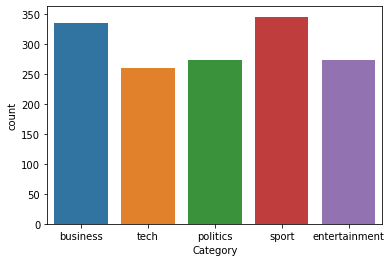

In [8]:
sns.countplot(data.Category)


In [9]:
data['News_length'] = data['Text'].str.len()
print(data['News_length'])

0       1866
1       2016
2       3104
3       3618
4       2190
        ... 
1485    1266
1486    3111
1487    1370
1488    3242
1489    1723
Name: News_length, Length: 1490, dtype: int64


## Distribution Plot

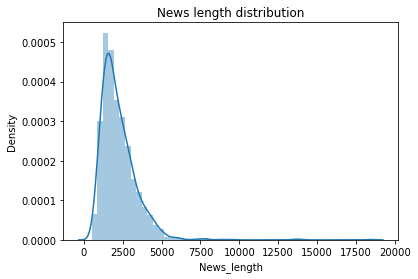

In [10]:
sns.distplot(data['News_length']).set_title('News length distribution');

# Feature Engineering
Removing the special characters

\r

\n

Removing Punctuations and Stopwords

In [13]:
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [14]:
data['Text_parsed'] = data['Text'].apply(process_text)


In [15]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...


# Label Encoding

In [16]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Category_target']= label_encoder.fit_transform(data['Category']) 

In [18]:
data.head()

,ArticleId,Text,Category,News_length,Text_parsed,Category_target
0,1833,worldcom ex-boss launches defence lawyers defe...,business,1866,worldcom exboss launches defence lawyers defen...,0
1,154,german business confidence slides german busin...,business,2016,german business confidence slides german busin...,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,3104,bbc poll indicates economic gloom citizens maj...,0
3,1976,lifestyle governs mobile choice faster bett...,tech,3618,lifestyle governs mobile choice faster better ...,4
4,917,enron bosses in $168m payout eighteen former e...,business,2190,enron bosses 168m payout eighteen former enron...,0


In [19]:
data.to_csv('BBC_News_processed.csv')


# Split the data in Training and testing


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data['Text_parsed'], 
                                                    data['Category_target'], 
                                                    test_size=0.2, 
                                                    random_state=8)

In [21]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [22]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

[[0.0894863  0.         0.         ... 0.         0.0463896  0.06766975]
 [0.05529176 0.         0.07204649 ... 0.03992422 0.08217012 0.07079346]
 [0.         0.         0.         ... 0.11423937 0.13886684 0.        ]
 ...
 [0.13256211 0.         0.17273162 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.04393444 0.         0.        ]]
(298, 300)


# Building Models

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
model  = RandomForestClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))


Accuracy:  0.9228187919463087
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        76
           1       0.96      0.91      0.93        47
           2       0.89      0.87      0.88        55
           3       0.93      0.97      0.95        65
           4       0.90      0.98      0.94        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



In [24]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

# Hyper Paramater Tuning(Random Forest)

In [25]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.7min


KeyboardInterrupt: 

In [ ]:
bestF.best_params_

In [26]:
from sklearn.ensemble import RandomForestClassifier
model1  = RandomForestClassifier(random_state=1,max_depth= 30, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
model1.fit(features_train, labels_train)
model_predictions = model1.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9161073825503355
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        76
           1       0.93      0.87      0.90        47
           2       0.89      0.87      0.88        55
           3       0.93      0.97      0.95        65
           4       0.90      0.98      0.94        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.91       298
weighted avg       0.92      0.92      0.92       298



# Logistic Regression

In [27]:
model = LogisticRegression()
print(model.get_params())
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# Hyper Parameter Tuning (Logistic Regression)


In [28]:
param_grid = {'C': [0.1,0.001,1],
    # Create a list of options for the regularization penalty
    'penalty' : ['l1', 'l2'] }
clf = GridSearchCV(model, param_grid, cv = 3, verbose = 1)

bestF = clf.fit(features_train, labels_train)
bestF.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished


{'C': 1, 'penalty': 'l2'}

In [29]:
model = LogisticRegression(C=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9429530201342282
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        76
           1       0.98      0.98      0.98        47
           2       0.96      0.87      0.91        55
           3       0.96      0.98      0.97        65
           4       0.91      0.96      0.94        55

    accuracy                           0.94       298
   macro avg       0.95      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



# KNeighborsClassifier

In [30]:
model = KNeighborsClassifier()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9093959731543624
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        76
           1       1.00      0.87      0.93        47
           2       0.84      0.89      0.87        55
           3       0.98      0.95      0.97        65
           4       0.83      0.96      0.89        55

    accuracy                           0.91       298
   macro avg       0.91      0.91      0.91       298
weighted avg       0.91      0.91      0.91       298



In [31]:
model.get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyper Paramaters Tuning (KNeighborsClassifier)


In [32]:
from sklearn.model_selection import GridSearchCV
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}


gridF = GridSearchCV(model, params_KNN, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(features_train, labels_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:   18.7s finished


In [33]:
bestF.best_params_

{'n_neighbors': 7, 'p': 2}

In [34]:
model = KNeighborsClassifier(n_neighbors=7,p=2)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.9161073825503355
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        76
           1       1.00      0.89      0.94        47
           2       0.88      0.91      0.89        55
           3       0.97      0.95      0.96        65
           4       0.83      0.96      0.89        55

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



# Decision Tree


In [35]:
model = DecisionTreeClassifier(random_state=1)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.7885906040268457
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        76
           1       0.86      0.89      0.88        47
           2       0.76      0.62      0.68        55
           3       0.82      0.92      0.87        65
           4       0.85      0.75      0.80        55

    accuracy                           0.79       298
   macro avg       0.80      0.79      0.79       298
weighted avg       0.79      0.79      0.79       298



In [36]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 1,
 'splitter': 'best'}

# Hyper Paramter Tuning (Decision Tree)


In [37]:
import numpy as np
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

min_samples_leaf = randint(1,9)

criterion = ['gini', 'entropy']
max_depth = [3,None]



hyperF = dict(max_depth=max_depth,
                      criterion=criterion,
                      min_samples_leaf=min_samples_leaf)

model  = DecisionTreeClassifier(random_state=1)
gridF = RandomizedSearchCV(model, hyperF, cv = 3, verbose = 1)
bestF = gridF.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.6s finished


In [38]:
bestF.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3}

In [40]:
model = DecisionTreeClassifier(random_state=1,criterion= 'entropy', max_depth= None,min_samples_leaf=6)
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.738255033557047
              precision    recall  f1-score   support

           0       0.71      0.66      0.68        76
           1       0.73      0.79      0.76        47
           2       0.74      0.67      0.70        55
           3       0.76      0.86      0.81        65
           4       0.75      0.73      0.74        55

    accuracy                           0.74       298
   macro avg       0.74      0.74      0.74       298
weighted avg       0.74      0.74      0.74       298



# GaussianNB

In [41]:
model = GaussianNB()
model.fit(features_train, labels_train)
model_predictions = model.predict(features_test)
print('Accuracy: ', accuracy_score(labels_test, model_predictions))
print(classification_report(labels_test, model_predictions))

Accuracy:  0.8859060402684564
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        76
           1       0.90      0.91      0.91        47
           2       0.90      0.84      0.87        55
           3       0.95      0.95      0.95        65
           4       0.82      0.91      0.86        55

    accuracy                           0.89       298
   macro avg       0.89      0.89      0.89       298
weighted avg       0.89      0.89      0.89       298

